#**Analisis de sentimiento de los tweets relacionados con cada cluster**



## Importamos librerías

In [1]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import tokenize
import numpy as np

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import os

import pandas as pd
import re
import matplotlib.pyplot as plt

import os
from glob import glob
import unicodedata # Preprocesado
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Conecto con drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_tweets='drive/My Drive/keepcoding/Tweets/tweets/'
path_words='drive/My Drive/keepcoding/Tweets/resultados/wordclouds/'


# Importo tweets 

In [5]:
files_education = [filename for filename in os.listdir(path_tweets+'/general') if filename.startswith("education")]
files_lessons = [filename for filename in os.listdir(path_tweets+'/general') if filename.startswith("lessons")]
files_school = [filename for filename in os.listdir(path_tweets+'/general') if filename.startswith("school")]
files_teacher = [filename for filename in os.listdir(path_tweets+'/general') if filename.startswith("teacher")]

In [6]:
df_education = pd.concat((pd.read_csv(path_tweets+'/general/'+f) for f in files_education), ignore_index=True).drop_duplicates()
df_lessons = pd.concat((pd.read_csv(path_tweets+'/general/'+f) for f in files_lessons), ignore_index=True).drop_duplicates()
df_school= pd.concat((pd.read_csv(path_tweets+'/general/'+f) for f in files_school), ignore_index=True).drop_duplicates()
df_teacher = pd.concat((pd.read_csv(path_tweets+'/general/'+f) for f in files_teacher), ignore_index=True).drop_duplicates()


In [7]:
print(f'Tengo {len(df_education)} relacionados con education')
print(f'Tengo {len(df_lessons)} relacionados con lessons')
print(f'Tengo {len(df_school)} relacionados con school')
print(f'Tengo {len(df_teacher)} relacionados con teacher')


Tengo 508 relacionados con education
Tengo 424 relacionados con lessons
Tengo 666 relacionados con school
Tengo 388 relacionados con teacher


## Limpiamos tweets

In [8]:
stop_words_custom={'school','lessons','classroom','education', 'student', 'students','teacher','taught','teachers','learn','learned','teaching'}
stop_words.update(stop_words_custom)

In [9]:
def sentence_normalization(sentence):
    sentence = unicodedata.normalize('NFKD', sentence).lower().encode('ascii', errors='ignore').decode('utf-8')
    sentence = re.sub(' +', ' ', ' '.join([word if word.isalpha() else '' for word in sentence.split()])).strip()
    return sentence

In [10]:
def remove_stopwords(sentence, stop_words):
    sentence = ' '.join([word for word in sentence.split() if word not in stop_words])
    return sentence

In [11]:
def process_tweets(reviews, stop_words):
    processed_sentences = []
    for sent in reviews:
        if not sent != sent:  # check if sent is not nan
            sent = sentence_normalization(sent)
            sent = remove_stopwords(sent, stop_words)
            processed_sentences.append(sent)
        else:
            processed_sentences.append('None')
    return processed_sentences

In [12]:
processed_tweets = process_tweets(df_education['tweet_text'], stop_words)
df_education['tweet_text_processed']=processed_tweets

In [13]:
print('Tweet original: {}'.format(df_education['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_education['tweet_text_processed'][6]))

Tweet original: Everyone—not just people who come from well-off families—should be able to continue their education after high scho… https://t.co/tVrQy6oUhY
Tweet procesado: everyonenot people come familiesshould able continue high


In [14]:
processed_tweets = process_tweets(df_lessons['tweet_text'], stop_words)
df_lessons['tweet_text_processed']=processed_tweets

In [15]:
print('Tweet original: {}'.format(df_lessons['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_lessons['tweet_text_processed'][6]))

Tweet original: Medvedev is again back on the bottle and ranting online about the need for Russia to destroy Ukraine as a nation.… https://t.co/9GhEFb0oSF
Tweet procesado: medvedev back bottle ranting online need russia destroy ukraine


In [16]:
processed_tweets = process_tweets(df_school['tweet_text'], stop_words)
df_school['tweet_text_processed']=processed_tweets

In [17]:
print('Tweet original: {}'.format(df_school['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_school['tweet_text_processed'][6]))

Tweet original: Kids in Tennessee are showing up in the thousands demanding action.

The nation is still mourning our children bein… https://t.co/2cVyxWNby5
Tweet procesado: kids tennessee showing thousands demanding nation still mourning children


In [18]:
processed_tweets = process_tweets(df_teacher['tweet_text'], stop_words)
df_teacher['tweet_text_processed']=processed_tweets

In [19]:
print('Tweet original: {}'.format(df_teacher['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_teacher['tweet_text_processed'][6]))

Tweet original: Reservation is spoiling the future of our country. The Science teacher with 0.4 and 0.6 numbers will teach the stud… https://t.co/S1gInZDoCC
Tweet procesado: reservation spoiling future science numbers teach


# Word cloud Education

In [20]:
splitted_tweets = df_education['tweet_text_processed'].str.lower().str.split()

In [21]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

In [22]:
words.to_csv(path_words+'words_Education.csv',index=False)

In [23]:
print(len(words))

4003


In [24]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

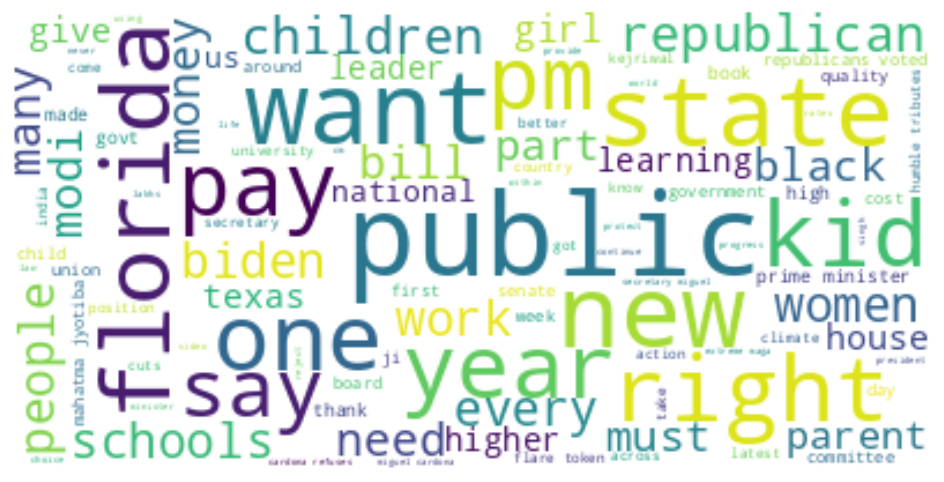

In [25]:
plot_word_cloud(words)

# Word cloud lessons

In [26]:
splitted_tweets = df_lessons['tweet_text_processed'].str.lower().str.split()

In [27]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

<ipython-input-27-65ab24f0894c>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)


In [28]:
# guardo para utilizar después en la presentación de resultados
words.to_csv(path_words+'words_lessons.csv',index=False)

In [29]:
print(len(words))

3059


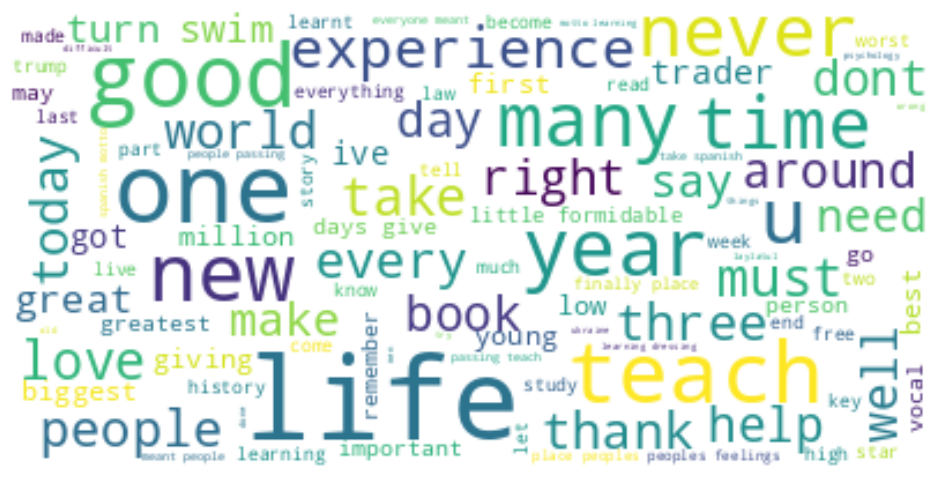

In [30]:
plot_word_cloud(words)


# Word cloud school

In [31]:
splitted_tweets = df_school['tweet_text_processed'].str.lower().str.split()

In [32]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

<ipython-input-32-65ab24f0894c>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)


In [33]:
# guardo para utilizar después en la presentación de resultados
words.to_csv(path_words+'words_school.csv',index=False)

In [34]:
print(len(words))

5374


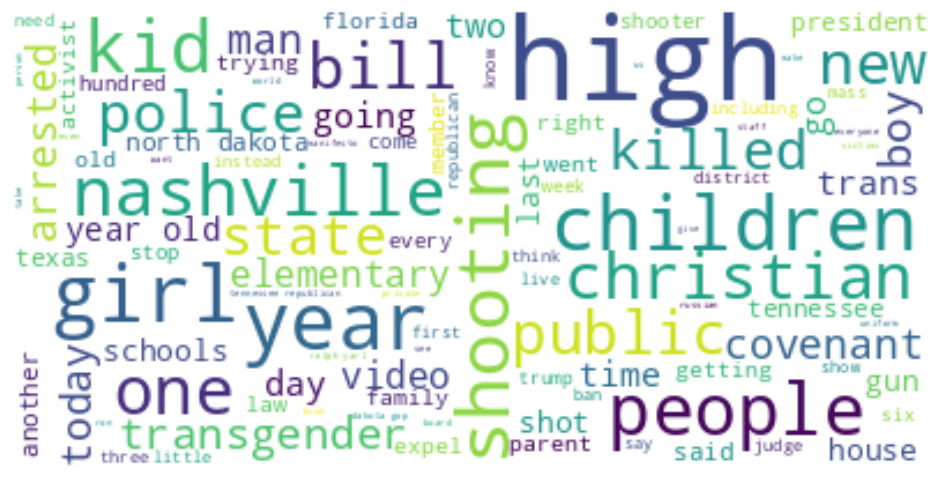

In [35]:
plot_word_cloud(words)


# Word cloud teacher

In [36]:
splitted_tweets = df_teacher['tweet_text_processed'].str.lower().str.split()

In [37]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

<ipython-input-37-65ab24f0894c>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)


In [38]:
# guardo para utilizar después en la presentación de resultados
words.to_csv(path_words+'words_teacher.csv',index=False)

In [39]:
print(len(words))

2724


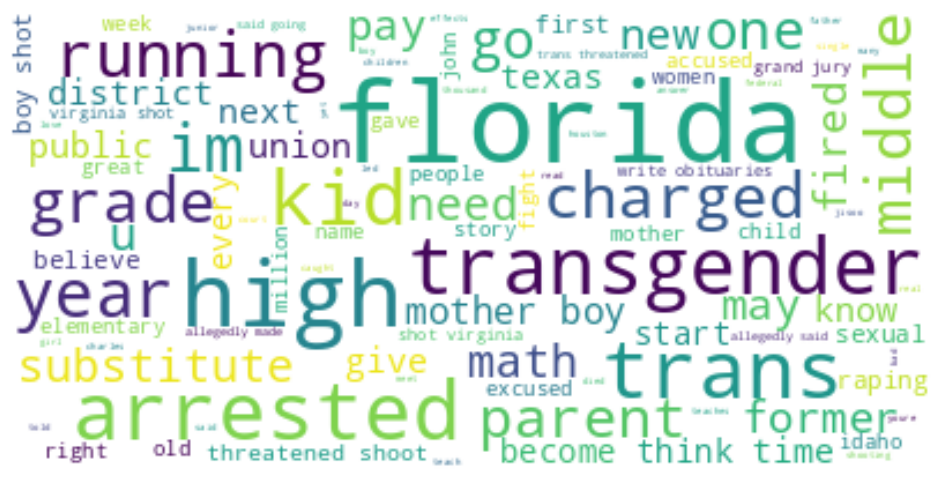

In [40]:
plot_word_cloud(words)